In [60]:
import pandas as pd 
import numpy as np


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics

# <b>3 <span style='color:#0386f7de'>|</span> Reading the dataset</b>

In [95]:
df = pd.read_csv('datasets/heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# <b>5 <span style='color:#0386f7de'>|</span> Data Cleaning</b>

In [96]:
df["AgeCategory"].unique()
df=df[df.columns].replace({'18-24':0, '25-29':1, '30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,
                        '75-79':11,'80 or older':12
})

In [97]:
df["GenHealth"].unique()
df = df[df.columns].replace({'Poor': 0, 'Fair': 1, 'Good': 2, 'Very good': 3, 'Excellent': 4,
                             })


In [98]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

In [99]:
convert_Dict={
    "PhysicalHealth": int,
    "MentalHealth":int,
}

df = df.astype(convert_Dict)

# <b>7<span style='color:#0386f7de'>|</span> Split Dataset for Training and Testing</b>

In [100]:
#Select Features
features = df.drop(columns =['HeartDisease','Race'], axis = 1)

#Select Target 
target = df['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 16)
Shape of testing feature: (63959, 16)
Shape of training label: (255836,)
Shape of training label: (63959,)


# <b>8<span style='color:#0386f7de'>|</span> Data Preprocessing</b>

In [101]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 255836 entries, 213522 to 14100
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               255836 non-null  float64
 1   Smoking           255836 non-null  int64  
 2   AlcoholDrinking   255836 non-null  int64  
 3   Stroke            255836 non-null  int64  
 4   PhysicalHealth    255836 non-null  int32  
 5   MentalHealth      255836 non-null  int32  
 6   DiffWalking       255836 non-null  int64  
 7   Sex               255836 non-null  int64  
 8   AgeCategory       255836 non-null  int64  
 9   Diabetic          255836 non-null  int32  
 10  PhysicalActivity  255836 non-null  int64  
 11  GenHealth         255836 non-null  int64  
 12  SleepTime         255836 non-null  float64
 13  Asthma            255836 non-null  int64  
 14  KidneyDisease     255836 non-null  int64  
 15  SkinCancer        255836 non-null  int64  
dtypes: float64(2), i

In [125]:
data={
    "HeartDisease":1,
    "BMI":16.60,
    "Smoking":0,
    "AlcoholDrinking":0,
    "Stroke":0,
    "PhysicalHealth":3.0,
    "MentalHealth":30.0,
    "DiffWalking":0,
    "Sex":0,
    "AgeCategory":4,
    "Diabetic":0,
    "PhysicalActivity":1,
    "GenHealth":2,
    "Race":"White",
    "SleepTime":5.0,
    "Asthma":0,
    "KidneyDisease":0,
    "SkinCancer":1,
    
    }

print(data)
test_df = pd.DataFrame(data, columns=['HeartDisease',"BMI", 'Smoking', 'AlcoholDrinking', 'Stroke',
                                      'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
                                      'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
                                      'Asthma', 'KidneyDisease', 'SkinCancer'],index=[0])
print(test_df)




{'HeartDisease': 1, 'BMI': 16.6, 'Smoking': 0, 'AlcoholDrinking': 0, 'Stroke': 0, 'PhysicalHealth': 3.0, 'MentalHealth': 30.0, 'DiffWalking': 0, 'Sex': 0, 'AgeCategory': 4, 'Diabetic': 0, 'PhysicalActivity': 1, 'GenHealth': 2, 'Race': 'White', 'SleepTime': 5.0, 'Asthma': 0, 'KidneyDisease': 0, 'SkinCancer': 1}
   HeartDisease   BMI  Smoking  AlcoholDrinking  Stroke  PhysicalHealth  \
0             1  16.6        0                0       0             3.0   

   MentalHealth  DiffWalking  Sex  AgeCategory   Race  Diabetic  \
0          30.0            0    0            4  White         0   

   PhysicalActivity  GenHealth  SleepTime  Asthma  KidneyDisease  SkinCancer  
0                 1          2        5.0       0              0           1  


In [115]:
y_test[:1]

141312    0
Name: HeartDisease, dtype: int64

In [105]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::, 1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}


In [112]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])



Accuracy: 0.8644444096999641
Precision: 0.2243502051983584
Recall: 0.24091076019096586
F1 Score: 0.23233575349743227
Cohens Kappa Score: 0.15809757477087483
Area Under Curve: 0.5823131974545628
Confusion Matrix:
 [[53977  4536]
 [ 4134  1312]]
[0]


d:\7th sem\Major\RUFine\diabetes\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [113]:
print(clf.predict([[31.32,	1,	0,	0,	0,	0,	0,	0,	7,	0, 1,	3,	6.0,	0,	0,	0]]))


[0]


d:\7th sem\Major\RUFine\diabetes\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [35]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['AgeCategory', 'Race', 'GenHealth']),
    remainder='passthrough')

# Encode training data 
transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names())

# Concat the two tables
transformed_train_data.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([transformed_train_data, X_train], axis=1)

# Remove old columns
X_train.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)



# Encode test data 
transformed_test = transformer.fit_transform(X_test)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
X_test = pd.concat([transformed_test_data, X_test], axis=1)


# Remove old columns
X_test.drop(['AgeCategory', 'Race', 'GenHealth'], axis = 1, inplace = True)


d:\7th sem\Major\RUFine\diabetes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
d:\7th sem\Major\RUFine\diabetes\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>7.1 | standardization</b></p>
</div>. 

In [36]:
X_train.shape

(255836, 52)

In [14]:
scaler = StandardScaler()

# Scale trainint data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)


# <b>9<span style='color:#0386f7de'>|</span> Modelling</b>

In [104]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

<div style="color:white;display:fill;border-radius:8px;
            background-color:#363c40de;font-size:150%;
            font-family:Nexa;letter-spacing:0.5px">
    <p style="padding: 8px
;color:white;"><b>9.1 | Building Model</b></p>
</div>. 

Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [116]:
# Building a model using KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)


# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.9070341937803905
Precision: 0.318577648766328
Recall: 0.08060962174072714
F1 Score: 0.1286635404454865
Cohens Kappa Score: 0.09763225766160333
Area Under Curve: 0.6876822288563124
Confusion Matrix:
 [[57574   939]
 [ 5007   439]]


In [117]:
import pickle

filename = 'final_knn_model.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [118]:
model1 = pickle.load(open('final_knn_model.pkl', 'rb'))

In [123]:
X_train.columns


Index(['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer'],
      dtype='object')

In [127]:
print(model1.predict_proba(
    [[data["BMI"],	data["Smoking"],	data["AlcoholDrinking"],	data["Stroke"],	data["PhysicalHealth"],	data["MentalHealth"],	data["DiffWalking"],
    	data["Sex"],	data["AgeCategory"],	data["Diabetic"], data[
    	    "PhysicalActivity"],	data["GenHealth"],	data["SleepTime"],	data["Asthma"],
        data["KidneyDisease"],	data["SkinCancer"]]])[0])


[1. 0.]


d:\7th sem\Major\RUFine\diabetes\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [19]:

# Building Decision Tree model 
clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Evaluate Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

Accuracy: 0.8646945699588799
Precision: 0.232220367278798
Recall: 0.25541681968417185
F1 Score: 0.2432668765302553
Cohens Kappa Score: 0.1691567154170338
Area Under Curve: 0.589573855978808
Confusion Matrix:
 [[53914  4599]
 [ 4055  1391]]


In [20]:
filename = 'final_clf_model.pkl'
pickle.dump(clf, open(filename, 'wb'))


In [23]:
X_train[0]

array([-0.26549634, -0.23664263, -0.25032481, -0.26108269, -0.26536134,
        3.69825223, -0.29379506, -0.3203179 , -0.34299642, -0.34618365,
       -0.3279389 , -0.26749845, -0.28628706, -0.12970784, -0.16066786,
       -0.27838661, -0.30613429, -0.18831638,  0.55204453, -0.51359598,
       -0.34860717, -0.64175066, -0.19139917,  1.34536057,  0.40438784,
       -0.83840809,  3.70087306, -0.19861298, -0.4234397 , -0.48982243,
       -0.40148642, -0.95368922, -0.39633881,  0.5383382 ,  1.32889385,
       -0.39281938, -0.19512091, -0.32147374,  0.40438784, -0.83840809,
        3.70087306, -0.19861298, -0.4234397 , -0.48982243, -0.40148642,
       -0.95368922, -0.39633881,  0.5383382 ,  1.32889385, -0.39281938,
       -0.19512091, -0.32147374])

In [ ]:
def predictHeart():
    

# <b>10<span style='color:#0386f7de'>|</span> Comparison</b>

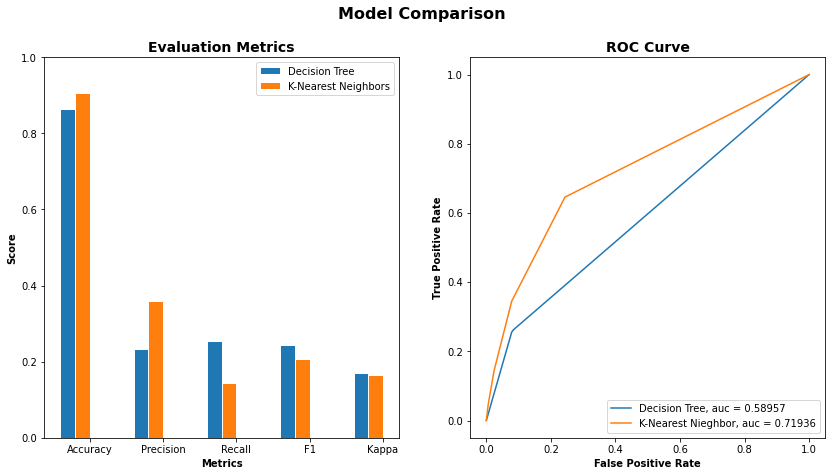

In [21]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
clf_score = [clf_eval['acc'], clf_eval['prec'], clf_eval['rec'], clf_eval['f1'], clf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]


## Set position of bar on X axis
r1 = np.arange(len(clf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, clf_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(clf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(clf_eval['fpr'], clf_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(clf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()